# Predicting Stroke using machine learning

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier, Pool, metrics, cv


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape 

(5110, 12)

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Let's find out how many of each class there
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

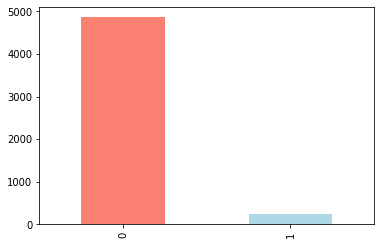

In [5]:
df["stroke"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Fill the Missing column
df["bmi"].fillna(df["bmi"].mean(),inplace=True)

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Stroke Frequency According to Sex

In [11]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.stroke, df.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


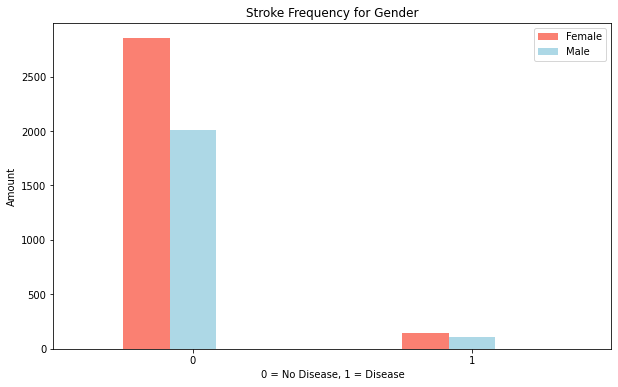

In [13]:
# Create a plot of crosstab
pd.crosstab(df.stroke, df.gender).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Stroke Frequency for Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [14]:
# Make a correlation matrix
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


(7.5, -0.5)

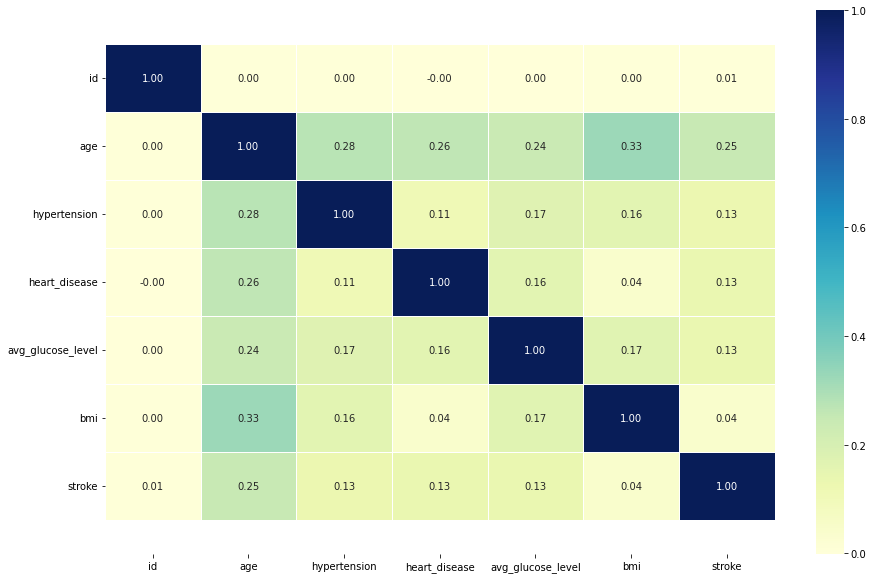

In [15]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

##  Convert Categorical columns to numeric

In [16]:
# Another way to do it with pd.dummies...
dummies = pd.get_dummies(df, columns=["gender", "work_type", "Residence_type", "smoking_status", "ever_married"], drop_first=True)
dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,0,1,0,0,1,1,0,0,1
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.500000,1,1,0,0,1,0,0,0,0,1,0,1
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,0,1,0,0,1,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0,0,0,1,0,0,1,0,1,0,1
5106,44873,81.0,0,0,125.20,40.000000,0,0,0,0,0,1,0,1,0,1,0,1
5107,19723,35.0,0,0,82.99,30.600000,0,0,0,0,0,1,0,0,0,1,0,1
5108,37544,51.0,0,0,166.29,25.600000,0,1,0,0,1,0,0,0,1,0,0,1


In [17]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   work_type_Never_worked          5110 non-null   uint8  
 10  work_type_Private               5110 non-null   uint8  
 11  work_type_Self-employed         5110 non-null   uint8  
 12  work_type_children              51

In [18]:
X = dummies.drop("stroke", axis=1)

In [19]:
y = dummies["stroke"]

In [20]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [21]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "XGBoost": XGBClassifier(),
          "CatBoost": CatBoostClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

Learning rate set to 0.018795
0:	learn: 0.6579097	total: 153ms	remaining: 2m 32s
1:	learn: 0.6297759	total: 166ms	remaining: 1m 22s
2:	learn: 0.6044193	total: 178ms	remaining: 59.3s
3:	learn: 0.5817813	total: 190ms	remaining: 47.2s
4:	learn: 0.5590076	total: 199ms	remaining: 39.6s
5:	learn: 0.5351530	total: 205ms	remaining: 33.9s
6:	learn: 0.5123135	total: 213ms	remaining: 30.3s
7:	learn: 0.4936697	total: 224ms	remaining: 27.7s
8:	learn: 0.4769906	total: 230ms	remaining: 25.3s
9:	learn: 0.4584801	total: 236ms	remaining: 23.3s
10:	learn: 0.4442669	total: 239ms	remaining: 21.5s
11:	learn: 0.4303228	total: 244ms	remaining: 20.1s
12:	learn: 0.4140784	total: 249ms	remaining: 18.9s
13:	learn: 0.4012877	total: 254ms	remaining: 17.9s
14:	learn: 0.3885001	total: 258ms	remaining: 17s
15:	learn: 0.3754840	total: 263ms	remaining: 16.1s
16:	learn: 0.3614831	total: 267ms	remaining: 15.5s
17:	learn: 0.3517016	total: 272ms	remaining: 14.8s
18:	learn: 0.3420540	total: 277ms	remaining: 14.3s
19:	learn: 

165:	learn: 0.1288091	total: 1.13s	remaining: 5.67s
166:	learn: 0.1286522	total: 1.14s	remaining: 5.66s
167:	learn: 0.1285349	total: 1.14s	remaining: 5.65s
168:	learn: 0.1283423	total: 1.15s	remaining: 5.64s
169:	learn: 0.1281779	total: 1.15s	remaining: 5.63s
170:	learn: 0.1280176	total: 1.16s	remaining: 5.64s
171:	learn: 0.1278442	total: 1.17s	remaining: 5.63s
172:	learn: 0.1277434	total: 1.17s	remaining: 5.61s
173:	learn: 0.1275000	total: 1.18s	remaining: 5.6s
174:	learn: 0.1273133	total: 1.18s	remaining: 5.58s
175:	learn: 0.1271010	total: 1.19s	remaining: 5.57s
176:	learn: 0.1269012	total: 1.2s	remaining: 5.56s
177:	learn: 0.1267689	total: 1.2s	remaining: 5.54s
178:	learn: 0.1266252	total: 1.2s	remaining: 5.52s
179:	learn: 0.1264758	total: 1.21s	remaining: 5.51s
180:	learn: 0.1263117	total: 1.21s	remaining: 5.49s
181:	learn: 0.1261270	total: 1.22s	remaining: 5.47s
182:	learn: 0.1259295	total: 1.23s	remaining: 5.47s
183:	learn: 0.1257403	total: 1.23s	remaining: 5.46s
184:	learn: 0.12

352:	learn: 0.1049839	total: 2.31s	remaining: 4.23s
353:	learn: 0.1048701	total: 2.31s	remaining: 4.22s
354:	learn: 0.1047812	total: 2.32s	remaining: 4.21s
355:	learn: 0.1046515	total: 2.33s	remaining: 4.21s
356:	learn: 0.1045242	total: 2.33s	remaining: 4.2s
357:	learn: 0.1044610	total: 2.34s	remaining: 4.2s
358:	learn: 0.1043821	total: 2.35s	remaining: 4.19s
359:	learn: 0.1042824	total: 2.35s	remaining: 4.18s
360:	learn: 0.1042386	total: 2.36s	remaining: 4.17s
361:	learn: 0.1041217	total: 2.36s	remaining: 4.16s
362:	learn: 0.1040023	total: 2.37s	remaining: 4.15s
363:	learn: 0.1038660	total: 2.37s	remaining: 4.14s
364:	learn: 0.1037625	total: 2.38s	remaining: 4.13s
365:	learn: 0.1036412	total: 2.38s	remaining: 4.13s
366:	learn: 0.1035401	total: 2.39s	remaining: 4.12s
367:	learn: 0.1033291	total: 2.39s	remaining: 4.11s
368:	learn: 0.1031018	total: 2.4s	remaining: 4.1s
369:	learn: 0.1030286	total: 2.4s	remaining: 4.09s
370:	learn: 0.1029611	total: 2.41s	remaining: 4.09s
371:	learn: 0.102

524:	learn: 0.0876863	total: 3.28s	remaining: 2.97s
525:	learn: 0.0876081	total: 3.29s	remaining: 2.96s
526:	learn: 0.0875431	total: 3.29s	remaining: 2.96s
527:	learn: 0.0875003	total: 3.3s	remaining: 2.95s
528:	learn: 0.0874527	total: 3.31s	remaining: 2.95s
529:	learn: 0.0873749	total: 3.31s	remaining: 2.94s
530:	learn: 0.0872067	total: 3.32s	remaining: 2.93s
531:	learn: 0.0870810	total: 3.33s	remaining: 2.93s
532:	learn: 0.0869678	total: 3.33s	remaining: 2.92s
533:	learn: 0.0869048	total: 3.34s	remaining: 2.91s
534:	learn: 0.0868487	total: 3.34s	remaining: 2.9s
535:	learn: 0.0867774	total: 3.35s	remaining: 2.9s
536:	learn: 0.0866804	total: 3.35s	remaining: 2.89s
537:	learn: 0.0866361	total: 3.36s	remaining: 2.88s
538:	learn: 0.0866018	total: 3.36s	remaining: 2.88s
539:	learn: 0.0865774	total: 3.37s	remaining: 2.87s
540:	learn: 0.0865422	total: 3.37s	remaining: 2.86s
541:	learn: 0.0864659	total: 3.38s	remaining: 2.86s
542:	learn: 0.0863654	total: 3.39s	remaining: 2.85s
543:	learn: 0.0

696:	learn: 0.0746806	total: 4.25s	remaining: 1.85s
697:	learn: 0.0746240	total: 4.26s	remaining: 1.84s
698:	learn: 0.0745205	total: 4.27s	remaining: 1.84s
699:	learn: 0.0744000	total: 4.27s	remaining: 1.83s
700:	learn: 0.0743439	total: 4.28s	remaining: 1.82s
701:	learn: 0.0742967	total: 4.28s	remaining: 1.82s
702:	learn: 0.0742389	total: 4.29s	remaining: 1.81s
703:	learn: 0.0741981	total: 4.29s	remaining: 1.8s
704:	learn: 0.0741772	total: 4.29s	remaining: 1.8s
705:	learn: 0.0741204	total: 4.3s	remaining: 1.79s
706:	learn: 0.0740673	total: 4.3s	remaining: 1.78s
707:	learn: 0.0740193	total: 4.31s	remaining: 1.78s
708:	learn: 0.0739385	total: 4.32s	remaining: 1.77s
709:	learn: 0.0738928	total: 4.33s	remaining: 1.77s
710:	learn: 0.0738247	total: 4.33s	remaining: 1.76s
711:	learn: 0.0737984	total: 4.33s	remaining: 1.75s
712:	learn: 0.0736869	total: 4.34s	remaining: 1.75s
713:	learn: 0.0736664	total: 4.34s	remaining: 1.74s
714:	learn: 0.0736380	total: 4.35s	remaining: 1.73s
715:	learn: 0.07

858:	learn: 0.0649420	total: 5.23s	remaining: 859ms
859:	learn: 0.0649130	total: 5.24s	remaining: 852ms
860:	learn: 0.0648324	total: 5.24s	remaining: 846ms
861:	learn: 0.0647724	total: 5.25s	remaining: 840ms
862:	learn: 0.0646879	total: 5.25s	remaining: 834ms
863:	learn: 0.0646512	total: 5.26s	remaining: 828ms
864:	learn: 0.0645718	total: 5.26s	remaining: 822ms
865:	learn: 0.0644925	total: 5.27s	remaining: 815ms
866:	learn: 0.0644153	total: 5.28s	remaining: 809ms
867:	learn: 0.0643529	total: 5.28s	remaining: 803ms
868:	learn: 0.0642893	total: 5.28s	remaining: 797ms
869:	learn: 0.0642318	total: 5.29s	remaining: 791ms
870:	learn: 0.0641989	total: 5.29s	remaining: 784ms
871:	learn: 0.0641541	total: 5.3s	remaining: 778ms
872:	learn: 0.0640583	total: 5.3s	remaining: 772ms
873:	learn: 0.0640073	total: 5.31s	remaining: 765ms
874:	learn: 0.0639324	total: 5.31s	remaining: 759ms
875:	learn: 0.0638547	total: 5.32s	remaining: 753ms
876:	learn: 0.0637537	total: 5.33s	remaining: 747ms
877:	learn: 0.

{'Logistic Regression': 0.9363992172211351,
 'KNN': 0.9393346379647749,
 'Random Forest': 0.9393346379647749,
 'Decision Tree': 0.9168297455968689,
 'AdaBoost': 0.9393346379647749,
 'XGBoost': 0.9383561643835616,
 'CatBoost': 0.9383561643835616}

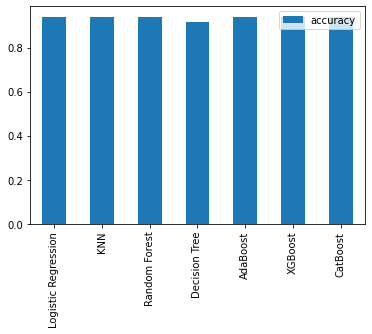

In [23]:
## Model Comparision
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now I got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [24]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [25]:
train_scores

[1.0,
 0.9564579256360078,
 0.9567025440313112,
 0.9545009784735812,
 0.9547455968688845,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779,
 0.9542563600782779]

In [26]:
test_scores

[0.9099804305283757,
 0.9393346379647749,
 0.9403131115459883,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749]

Maximum KNN score on the test data: 94.03%


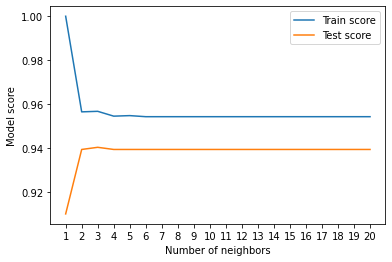

In [27]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [28]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [29]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [31]:
rs_log_reg.score(X_test, y_test)

0.9393346379647749

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [32]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [34]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9393346379647749

In [35]:
model_scores

{'Logistic Regression': 0.9363992172211351,
 'KNN': 0.9393346379647749,
 'Random Forest': 0.9393346379647749,
 'Decision Tree': 0.9168297455968689,
 'AdaBoost': 0.9393346379647749,
 'XGBoost': 0.9383561643835616,
 'CatBoost': 0.9383561643835616}

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [36]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [38]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9393346379647749

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [39]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [40]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


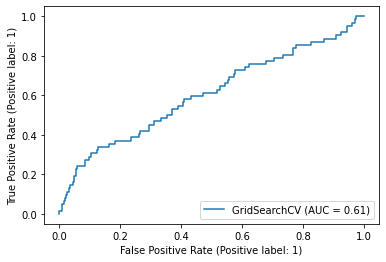

In [42]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [43]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[960   0]
 [ 62   0]]


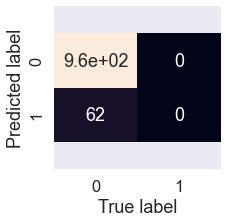

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [46]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [47]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.1,
                         solver="liblinear")

In [48]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.95107632, 0.94716243, 0.95205479, 0.94911937, 0.95205479])

In [49]:
cv_acc = np.mean(cv_acc)
cv_acc

0.950293542074364

In [50]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3

In [51]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall =np.mean(cv_recall)
cv_recall 

0.008081632653061225

In [52]:
# Cross-validated precision
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.01568627450980392

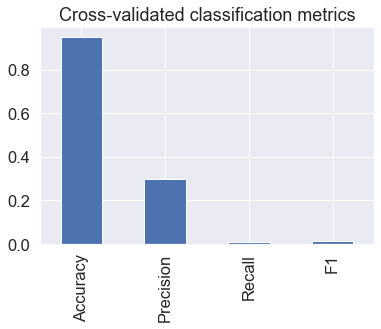

In [53]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [54]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [55]:
# Check coef_
clf.coef_

array([[-1.30075091e-05,  4.03421578e-02,  3.81608716e-03,
         2.98230739e-03,  8.35296093e-04, -1.65489693e-01,
        -3.10473215e-03,  0.00000000e+00, -1.43752166e-04,
        -4.23292631e-03, -6.55021307e-04, -4.60629712e-03,
        -5.07347762e-03,  2.11685477e-04, -3.97841007e-03,
        -7.44263717e-04, -2.74172258e-03]])

In [56]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [57]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'id': -1.3007509078606258e-05,
 'gender': 0.040342157829570034,
 'age': 0.0038160871579487987,
 'hypertension': 0.002982307390876918,
 'heart_disease': 0.0008352960933025619,
 'ever_married': -0.16548969266465308,
 'work_type': -0.003104732147961488,
 'Residence_type': 0.0,
 'avg_glucose_level': -0.00014375216552273186,
 'bmi': -0.004232926308961399,
 'smoking_status': -0.000655021307019641,
 'stroke': -0.004606297123272685}

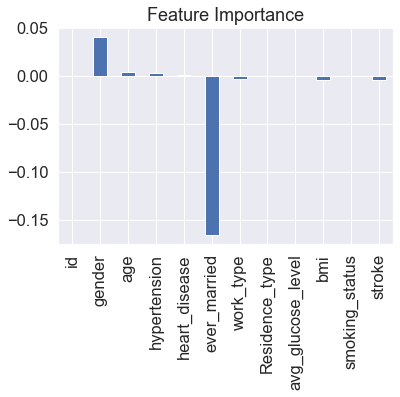

In [58]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [59]:
pd.crosstab(df["gender"], df["stroke"])

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [60]:
pd.crosstab(df["ever_married"], df["stroke"])

stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220
